# Linear Regression and Regularization

## Library and Setup

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Regex
import re

# Statistics
import scipy.stats as stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Case Study: Laptop Price Prediction

On this occasion, we will try to understand what makes a price of a laptop to increase by building a linear model. For a computer geek or people who manufactured laptops may already now the production cost of each component. However, for a lay people like us who only know how to use the laptop, exploring this dataset and building a machine learning model around it will help us to compare laptop with various specifications and build by various companies. We may also see some intangible factors that can affect the price, such as the value of a brand like Apple.

## Data

The data come from [Laptop Company Price List](https://www.kaggle.com/muhammetvarl/laptop-price) with the following dictionary:

- **Company**: Laptop Manufacturer
- **Product**: Brand and Model
- **TypeName**: Type (Notebook, Ultrabook, Gaming, etc.)
- **Inches**: Screen Size
- **ScreenResolution**: Screen Resolution
- **Cpu**: Central Processing Unit (CPU)
- **Ram**: Laptop RAM
- **Memory**: Hard Disk / SSD Memory
- **GPU**: Graphics Processing Units (GPU)
- **OpSys**: Operating System
- **Weight**: Laptop Weight
- **Price_euros**: Price in Euro

In [2]:
laptop = pd.read_csv('data/laptop_price.csv')

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Let's check the data type of each column.

In [3]:
laptop.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

Let's check if there is any duplicated data.

In [4]:
laptop[ laptop.duplicated()].shape

(0, 13)

Based on the finding, we will have 0 observation of duplicated data.

Let's check if there is any missing value from each column.

In [5]:
laptop.isnull().sum(axis = 0)

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Based on the result, we find that there is no missing value in any column on our dataset.

## Data Wrangling

Although the information given from the dataset is quite comprehensive, we need to transform the data to a proper format to build a machine learning.

### Transforming Weight

The first we do is removing the weight unit (kg) from the `Weight` column and tranform the value into float/numeric.

In [6]:
laptop['Weight'] = list(map(lambda x: float(re.sub('kg', '', x)), laptop['Weight']))

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


Let's check if there is any missing value as a result of our data wrangling process on the `Weight` column.

In [7]:
laptop['Weight'].isnull().sum()

0

### Transforming RAM

The next thing we do is removing the unit `GB` from the `Ram` column and transform the value into integer.

In [8]:
laptop['Ram'] = list(map(lambda x: int(re.sub('GB', '', x)), laptop['Ram']))

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


### Transforming Memory

Now we will separate the `Memory` column into 3 different columns: SSD, HDD, and Flash based on the type of the storage system. The first thing we do is to find the specific storage type, for example SSD, and extract the value. If a laptop does not have any SSD, the value will be empty.

Here I use the regex pattern `\d+` which means digits (0-9) followed by the unit size of the storage (GB/TB) and ended with SSD to indicate that we only looking for SSD system.

In [9]:
temp_ssd = list(map(lambda x: re.findall('\d+GB SSD|\d+TB SSD', x), laptop['Memory']))

temp_ssd[0:10]

[['128GB SSD'],
 [],
 ['256GB SSD'],
 ['512GB SSD'],
 ['256GB SSD'],
 [],
 [],
 [],
 ['512GB SSD'],
 ['256GB SSD']]

The next thing we do is converting the string into proper numeric storage size value. If we find laptop with a TB size of storage, we will convert it into GB by multiply the value with 1000. Some laptops may have 2 separate SSD embedded, such as 256GB SSD + 256GB SSD. To simplify the problem, we just sum the value.

In [10]:
final_ssd = []

for i in range(len(temp_ssd)):

    for j in range(len(temp_ssd[i])):
        if re.search('TB', temp_ssd[i][j]):
            temp_ssd[i][j] = int(re.sub('TB SSD', '', temp_ssd[i][j]))*1000 # Convert TB to GB
        else:
            temp_ssd[i][j] = int(re.sub('GB SSD', '', temp_ssd[i][j])) 
    
    final_ssd.append( np.sum(temp_ssd[i])) # Sum the SSD Memory Storage

final_ssd[0:10]

[128, 0.0, 256, 512, 256, 0.0, 0.0, 0.0, 512, 256]

We will do the same thing with the HDD and Flash Storage.

In [11]:
# HDD Storage
temp_hdd = list(map(lambda x: re.findall('\d+GB HDD|\d+TB HDD', x), laptop['Memory']))
final_hdd = []

for i in range(len(temp_hdd)):

    for j in range(len(temp_hdd[i])):
        if re.search('TB', temp_hdd[i][j]):
            temp_hdd[i][j] = int(re.sub('TB HDD', '', temp_hdd[i][j]))*1000 # Convert TB to GB
        else:
            temp_hdd[i][j] = int(re.sub('GB HDD', '', temp_hdd[i][j])) 
    
    final_hdd.append( np.sum(temp_hdd[i])) # Sum the total hdd Memory Storage

# Flash Storage
temp_flash = list(map(lambda x: re.findall('\d+GB Flash|\d+TB Flash', x), laptop['Memory']))
final_flash = []

for i in range(len(temp_flash)):

    for j in range(len(temp_flash[i])):
        if re.search('TB', temp_flash[i][j]):
            temp_flash[i][j] = int(re.sub('TB Flash', '', temp_flash[i][j]))*1000 # Convert TB to GB
        else:
            temp_flash[i][j] = int(re.sub('GB Flash', '', temp_flash[i][j])) 
    
    final_flash.append( np.sum(temp_flash[i])) # Sum the total flash Memory Storage

Finally, we will attach the processed list into the initial `laptop` dataframe.

In [12]:
laptop['ssd'] = final_ssd
laptop['hdd'] = final_hdd
laptop['flash'] = final_flash

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,flash
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0,0.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256.0,0.0,0.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,0.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,0.0


### Transforming CPU

The next thing we do is transforming the `Cpu` column. We will separate the processor type and the processor clock speed.


The processor clock speed is indicated by the number followed by the GigaHertz (GHz) unit. To simplify the processor/CPU type and prevent us from getting to many categorical class, we will only consider the general type only. For example, `Intel Core i5` and `Intel Core i5 7200U` will be considered as the same type of CPU.

In [13]:
laptop['Cpu'][0:10]

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
5       AMD A9-Series 9420 3GHz
6          Intel Core i7 2.2GHz
7          Intel Core i5 1.8GHz
8    Intel Core i7 8550U 1.8GHz
9    Intel Core i5 8250U 1.6GHz
Name: Cpu, dtype: object

Let's check the initial CPU type name cleansing process. We expect a general CPU type and try not to be to specific to reduce number of new features.

In [14]:
# CPU type
laptop_cpu = list(map(lambda x: re.findall('.*? \d+', x)[0].strip(), laptop['Cpu']))
laptop_cpu = list(map(lambda x: re.sub(' \d+.*', '', x), laptop_cpu)) # Remove string started with numbers after whitespace
laptop_cpu = list(map(lambda x: re.sub('[-].*', '', x), laptop_cpu)) # Remove type extension such as x-Z090 into x
laptop_cpu = list(map(lambda x: re.sub(' [A-Z]\d+.*', '', x), laptop_cpu)) # Remove string started with capital letters followed by numbers after whitespace

pd.DataFrame(laptop_cpu).value_counts()

Intel Core i7              527
Intel Core i5              423
Intel Core i3              136
Intel Celeron Dual Core     80
AMD                         47
Intel Pentium Quad Core     27
Intel Core M                16
Intel Atom x5               10
AMD E                        9
Intel Celeron Quad Core      8
Intel Xeon                   4
AMD Ryzen                    4
Intel Pentium Dual Core      3
Intel Atom                   3
Intel Core M m3              2
AMD FX                       2
Intel Core M m7              1
Samsung Cortex               1
dtype: int64

We will continue by extracting the CPU clock speed.

In [15]:
# CPU clock speed
laptop_cpu_clock = list(map(lambda x: float(re.sub('GHz', '', re.findall('\d+GHz|\d+[.]\d+.*GHz', x)[0])), laptop['Cpu']))

laptop_cpu_clock[0:10]

[2.3, 1.8, 2.5, 2.7, 3.1, 3.0, 2.2, 1.8, 1.8, 1.6]

After we have collected the list for the processor type and the processor clock speed, we attach them to the initial dataset.

In [16]:
laptop['cpu_type'] = laptop_cpu
laptop['cpu_clock'] = laptop_cpu_clock

laptop.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,cpu_clock
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,3.1
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00,0.0,500.0,0.0,AMD,3.0
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,0.0,0.0,256.0,Intel Core i7,2.2
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70,0.0,0.0,256.0,Intel Core i5,1.8
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00,512.0,0.0,0.0,Intel Core i7,1.8
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00,256.0,0.0,0.0,Intel Core i5,1.6


### Transforming GPU

GPU is also an important part, especially for people who want to look for better gaming experience. Since there are a lot of GPU variant, we will only extract the first 2 words from the GPU type. For example, `Intel Iris` or `Intel HD`.

In [17]:
# gpu_type = list(map(lambda x: re.findall('.*? ', x)[0].strip(), laptop['Gpu']))
gpu_type = list(map(lambda x: " ".join(x.split()[0:2]), laptop['Gpu']))

laptop['gpu_type'] = gpu_type

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,cpu_clock,gpu_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,2.3,Intel Iris
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,1.8,Intel HD
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,2.5,Intel HD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,2.7,AMD Radeon
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,3.1,Intel Iris


### Transforming Screen Resolution

Next, we will extract information from the `ScreenResolution`. If the laptop has touchscreen feature, we will give value of `1`.

In [18]:
touch_screen = []

for i in range(len(laptop['ScreenResolution'])):
    if re.search('Touchscreen', laptop['ScreenResolution'][i]):
        touch_screen.append(1)
    else:
        touch_screen.append(0)

touch_screen[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Now we will extract the screen width. A special is when the screen resolution is in 4K, where the dimension is not explicitly stated. To counter such problem, we will assume that for all laptop with 4K resolution has aspect ratio of 16:9 or 3840x2160, which is the most common 4K resolution according to [PC Monitors](https://pcmonitors.info/articles/the-4k-uhd-3840-x-2160-experience/).

In [19]:
screen_width_str = list(map(lambda x: re.sub('x', '', re.findall('\d+.*?x', x)[0]), laptop['ScreenResolution']))
screen_width = []

for i in range(len(screen_width_str)):
    if re.search('4K', screen_width_str[i]):
       screen_width.append(3840)
    else: 
        screen_width.append(int(screen_width_str[i])) 

screen_width[0:10]

[2560, 1440, 1920, 2880, 2560, 1366, 2880, 1440, 1920, 1920]

We will continue extracting the width resolution of the screen.

In [20]:
screen_height_str = list(map(lambda x: re.sub('x', '', re.findall('x.*\d+', x)[0]), laptop['ScreenResolution']))
screen_height = []

for i in range(len(screen_height_str)):
    if re.search('4K', screen_height_str[i]):
       screen_height.append(2160)
    else: 
        screen_height.append(int(screen_height_str[i])) 

screen_height[0:10]

[1600, 900, 1080, 1800, 1600, 768, 1800, 900, 1080, 1080]

We will also extract the type of the monitor. If an observation doesn't have any type of monitor and only show the screen resolution, we will fill the monitor type with `others`.

In [21]:
monitor_type = list(map(lambda x: re.sub('\d+.*x.*', '', x), laptop['ScreenResolution']))
monitor_type = list(map(lambda x: re.sub('Touchscreen', '', x), monitor_type))
monitor_type = list(map(lambda x: re.sub('[/]', '', x).strip(), monitor_type))

for i in range(len(monitor_type)):
    if monitor_type[i] == '':
        monitor_type[i] = 'others'

pd.DataFrame(monitor_type).value_counts()

Full HD                     555
others                      364
IPS Panel Full HD           288
IPS Panel                    49
Quad HD+                     19
IPS Panel Retina Display     17
IPS Panel Quad HD+           11
dtype: int64

Finally, we attach the screen information to the initial dataset.

In [22]:
laptop['touchscreen'] = touch_screen
laptop['screen_width'] = screen_width
laptop['screen_height'] = screen_height
laptop['monitor_type'] = monitor_type

laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,ssd,hdd,flash,cpu_type,cpu_clock,gpu_type,touchscreen,screen_width,screen_height,monitor_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,128.0,0.0,0.0,Intel Core i5,2.3,Intel Iris,0,2560,1600,IPS Panel Retina Display
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,0.0,0.0,128.0,Intel Core i5,1.8,Intel HD,0,1440,900,others
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,256.0,0.0,0.0,Intel Core i5,2.5,Intel HD,0,1920,1080,Full HD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,512.0,0.0,0.0,Intel Core i7,2.7,AMD Radeon,0,2880,1800,IPS Panel Retina Display
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,256.0,0.0,0.0,Intel Core i5,3.1,Intel Iris,0,2560,1600,IPS Panel Retina Display


## Exploratory Data Analysis

After we have completed the data wrangling process, we will continue exploring the information from the dataset. Understanding the data is crucial before we start to build the machine learning model.

To simplify the dataset, we will drop some columns that are not necessary for building the model.

In [23]:
laptop_clean = laptop.copy()
laptop_clean.drop(['laptop_ID', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu'], axis = 1, inplace = True)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,cpu_clock,gpu_type,touchscreen,screen_width,screen_height,monitor_type
0,Apple,13.3,8,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,2.3,Intel Iris,0,2560,1600,IPS Panel Retina Display
1,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,1.8,Intel HD,0,1440,900,others
2,HP,15.6,8,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,2.5,Intel HD,0,1920,1080,Full HD
3,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,2.7,AMD Radeon,0,2880,1800,IPS Panel Retina Display
4,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,3.1,Intel Iris,0,2560,1600,IPS Panel Retina Display


### Price Between Companies

Let's explore the distribution of laptop price from different companies, regardless of the laptop specs.

Text(0, 0.5, 'Company')

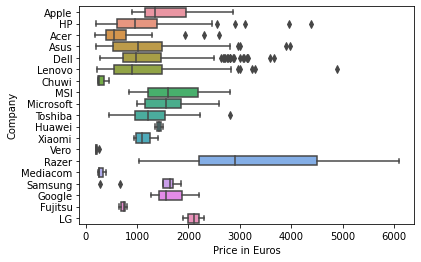

In [24]:
sns.boxplot(x = 'Price_euros', y = 'Company', data = laptop)
plt.xlabel('Price in Euros')
plt.ylabel('Company')

One interesting finding from this boxplot is that `Razer` has a great price range. However, most of its laptop is still more pricy than other brands. Popular laptop such as `Asus` and `Acer` has less median than `Apple` or `MSI`.

### Correlation Between Variables

First, we will check the correlation between the numeric features and the target variables. Blue color indicate positive correlation while red color indicate negative correlation. If two variables are not correlated, they will be shown as white.

Text(0.5, 0, '')

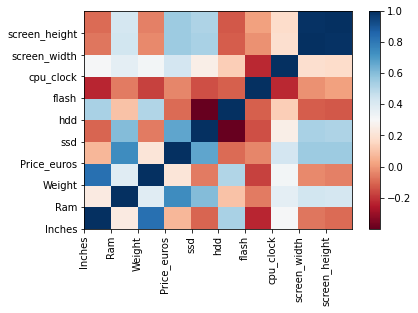

In [25]:
corr_mat = laptop_clean.drop('touchscreen', axis = 1).corr()

plt.pcolor(corr_mat, cmap = 'RdBu')
plt.colorbar()
plt.xticks(range(len(list(corr_mat.columns))), labels= list(corr_mat.columns), rotation = 90)
plt.yticks(range(len(list(corr_mat.columns))), labels= list(corr_mat.columns))
plt.xlabel('')

Based on the correlation matrix, we can see that the price (`Price_euros`) has a relatively strong correlation with the RAM while other features has low correlation with the price.

### Operating System (OS)

Next, we will check the number of each variant of the operating system (OS) of the laptop.


Text(0.5, 1.0, 'Operating System')

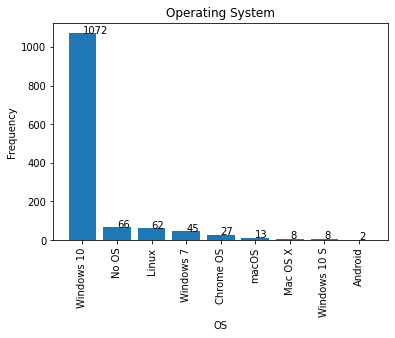

In [26]:
laptop_agg = laptop_clean[['Price_euros', 'OpSys']].groupby('OpSys').count().\
    rename(columns = {'Price_euros':'Frequency'}).sort_values(by = 'Frequency', ascending = False)

plt.bar(x = laptop_agg.index, height = laptop_agg['Frequency'])

# Insert text
for i in range(laptop_agg.shape[0]):
    plt.text(laptop_agg.index[i], laptop_agg['Frequency'][i], laptop_agg['Frequency'][i])

plt.xticks(rotation = 90)
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.title('Operating System')

### CPU

Next, we will check the frequency of each type of processor based on the CPU general type.

Text(0.5, 1.0, 'CPU Type by Frequency')

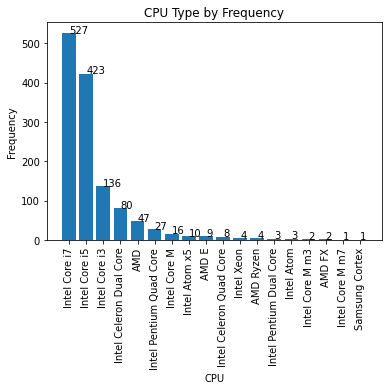

In [27]:
laptop_agg = laptop_clean[['Price_euros', 'cpu_type']].groupby('cpu_type').count().\
    rename(columns = {'Price_euros':'Frequency'}).sort_values(by = 'Frequency', ascending = False)

plt.bar(x = laptop_agg.index, height = laptop_agg['Frequency'])

# Insert text
for i in range(laptop_agg.shape[0]):
    plt.text(laptop_agg.index[i], laptop_agg['Frequency'][i], laptop_agg['Frequency'][i])

plt.xticks(rotation = 90)
plt.xlabel('CPU')
plt.ylabel('Frequency')
plt.title('CPU Type by Frequency')

Intel Core series are the most frequent processor type in the market. There are some CPU type with only 1 or 2 observations, such as the Samsung Cortex. We will label CPU type as `other` for CPU with only  observation from the data.


In [28]:
low_cpu = list(laptop_agg[ laptop_agg['Frequency'] == 1].index)

id_pos = list(laptop_clean['cpu_type'][laptop_clean['cpu_type'].isin(low_cpu)].index)

laptop_clean.loc[id_pos, 'cpu_type'] = '1_others'

laptop_clean[['cpu_type']].value_counts()

cpu_type               
Intel Core i7              527
Intel Core i5              423
Intel Core i3              136
Intel Celeron Dual Core     80
AMD                         47
Intel Pentium Quad Core     27
Intel Core M                16
Intel Atom x5               10
AMD E                        9
Intel Celeron Quad Core      8
Intel Xeon                   4
AMD Ryzen                    4
Intel Atom                   3
Intel Pentium Dual Core      3
Intel Core M m3              2
AMD FX                       2
1_others                     2
dtype: int64

Let's check the price distribution for each CPU vendor.

Text(0.5, 0, 'Price in Euro')

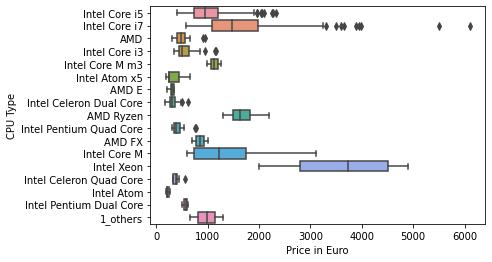

In [29]:
sns.boxplot(data = laptop_clean, y = 'cpu_type', x = 'Price_euros')
plt.ylabel('CPU Type')
plt.xlabel('Price in Euro')

Based on the boxplot, we can see that Intel Xeon, Intel Core i7, and AMD Ryzen has higher median compared to other processor. The most expensive laptops are build with Intel Core i7 based on the outliers.

### GPU

We will continue by checking the type of the GPU.

Text(0.5, 1.0, 'GPU Type by Frequency')

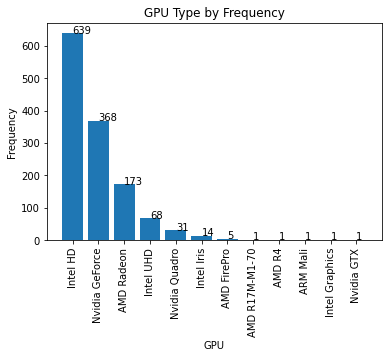

In [30]:
laptop_agg = laptop_clean[['Price_euros', 'gpu_type']].groupby('gpu_type').count().\
    rename(columns = {'Price_euros':'Frequency'}).sort_values(by = 'Frequency', ascending = False)

plt.bar(x = laptop_agg.index, height = laptop_agg['Frequency'])

# Insert text
for i in range(laptop_agg.shape[0]):
    plt.text(laptop_agg.index[i], laptop_agg['Frequency'][i], laptop_agg['Frequency'][i])

plt.xticks(rotation = 90)
plt.xlabel('GPU')
plt.ylabel('Frequency')
plt.title('GPU Type by Frequency')

Intel HD is the most common, followed by the NVidia GeForce series. We will also group all GPU that only has 1 observation as `others`.


In [31]:
low_gpu = list(laptop_agg[ laptop_agg['Frequency'] == 1].index)

id_pos = list(laptop_clean[ laptop_clean['gpu_type'].isin(low_gpu)].index)

laptop_clean.loc[id_pos, 'gpu_type'] = '1_others'

laptop_clean[['gpu_type']].value_counts()

gpu_type      
Intel HD          639
Nvidia GeForce    368
AMD Radeon        173
Intel UHD          68
Nvidia Quadro      31
Intel Iris         14
1_others            5
AMD FirePro         5
dtype: int64

We will also check the price distribution of each GPU type.

Text(0.5, 0, 'Price in Euro')

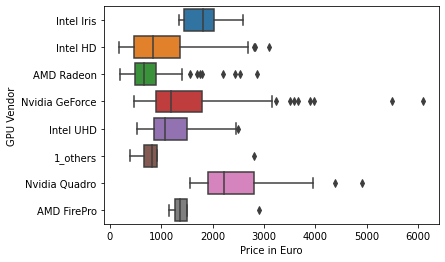

In [32]:
sns.boxplot(data = laptop_clean, y = 'gpu_type', x = 'Price_euros')
plt.ylabel('GPU Vendor')
plt.xlabel('Price in Euro')

Based on the distribution of each boxplot, laptop with NVidia GPU is slightly more pricy compared to other vendor. From the outliers, combined with the information from the previous CPU vendor price distribution, we can see that laptop with Intel process and NVidia GPU has higher price. This is kinda expected since most gaming laptop tend to have NVidia GPU and Intel processor. To check this argument, we will explore the laptop with price higher than 3000 Euro and see the combination of the CPU and GPU.

In [33]:
laptop[['Company', 'Product', 'Cpu', 'Gpu']][ laptop['Price_euros'] > 3000]

,Company,Product,Cpu,Gpu
196,Razer,Blade Pro,Intel Core i7 7820HK 2.9GHz,Nvidia GeForce GTX 1080
204,Dell,Precision 7520,Intel Xeon E3-1505M V6 3GHz,Nvidia Quadro M1200
238,Asus,ROG G703VI-E5062T,Intel Core i7 7820HK 2.9GHz,Nvidia GeForce GTX 1080
530,Dell,Alienware 17,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070
610,Lenovo,Thinkpad P51,Intel Xeon E3-1535M v6 3.1GHz,Nvidia Quadro M2200M
659,Dell,Alienware 17,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070
723,Dell,Alienware 17,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070
744,Lenovo,Thinkpad P51s,Intel Core i7 7600U 2.8GHz,Nvidia Quadro M520M
749,HP,Zbook 17,Intel Xeon E3-1535M v5 2.9GHz,Nvidia Quadro M2000M
780,Dell,Alienware 17,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1070M


We can see that all of the laptop with price higher than 3000 Euro has Intel Core i7 or higher as the processor and NVidia as the GPU. We have done the exploratory data analysis to understand our data, now we will start to build the machine learning model.



## One-Hot Encoding

Before we split the data into data training and data testing, now we will convert the categorical variable into dummy features by using one-hot encoding so that it can be processed by the machine learing model.

The following columns will be transformed:

- cpu_type
- gpu_type
- OpSys (OS)

First, we will convert the category into integer number using the label encoding. For example, AMD will be 0, Intel will be 1, etc. After the data is converted, we then apply the one-hot encoding and convert the result into an array. The `drop='first'` will remove the first category from the encoding, so if we have 5 different categories in the column, we will only get 4 new columns from the result of one-hot encoding. Since we name the `others` category as `1_others`, it will be removed during the encoding process, allowing us to predict any new type of category that is not present in the current dataset.


In [34]:
# Convert Category into Integer
cpu_label = LabelEncoder().fit(laptop_clean['cpu_type']).transform(laptop_clean['cpu_type'])
cpu_label = cpu_label.reshape(len(laptop_clean['cpu_type']), 1)

# Convert Label into One Hot Encoding
cpu_label = OneHotEncoder(drop = 'first').fit(cpu_label).transform(cpu_label).toarray()

cpu_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

To help us during model interpretation, we will collect the cpu category as the column name for later purpose. One hot encoding will use alphabetical order everytime it convert the categorical data.

In [35]:
cpu_name = list(set(laptop_clean['cpu_type']))
cpu_name.sort()
cpu_name = list(map(lambda x: 'cpu_' + x, cpu_name))
cpu_name = cpu_name[ 1:len(cpu_name) ]

cpu_onehot = pd.DataFrame(cpu_label, columns = cpu_name)

cpu_onehot.head()

,cpu_AMD,cpu_AMD E,cpu_AMD FX,cpu_AMD Ryzen,cpu_Intel Atom,cpu_Intel Atom x5,cpu_Intel Celeron Dual Core,cpu_Intel Celeron Quad Core,cpu_Intel Core M,cpu_Intel Core M m3,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel Pentium Dual Core,cpu_Intel Pentium Quad Core,cpu_Intel Xeon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Finally, we will create a dataframe from the one hot encoding and add them into the dataset.

In [36]:
laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), cpu_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,cpu_Intel Celeron Dual Core,cpu_Intel Celeron Quad Core,cpu_Intel Core M,cpu_Intel Core M m3,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel Pentium Dual Core,cpu_Intel Pentium Quad Core,cpu_Intel Xeon
0,Apple,13.3,8,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HP,15.6,8,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


We will do the same thing for the GPU type, company and the OS.

In [37]:
# Convert Category into Integer
gpu_label = LabelEncoder().fit(laptop_clean['gpu_type']).transform(laptop_clean['gpu_type'])
gpu_label = gpu_label.reshape(len(laptop_clean['gpu_type']), 1)

# Convert Label into One Hot Encoding
gpu_label = OneHotEncoder(drop = 'first').fit(gpu_label).transform(gpu_label).toarray()

# Create Column name
gpu_name = list(set(laptop_clean['gpu_type']))
gpu_name.sort()
gpu_name = list(map(lambda x: 'gpu_' + x, gpu_name))
gpu_name = gpu_name[ 1:len(gpu_name) ]

# Concat the Column
gpu_onehot = pd.DataFrame(gpu_label, columns = gpu_name)

laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), gpu_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,cpu_Intel Pentium Dual Core,cpu_Intel Pentium Quad Core,cpu_Intel Xeon,gpu_AMD FirePro,gpu_AMD Radeon,gpu_Intel HD,gpu_Intel Iris,gpu_Intel UHD,gpu_Nvidia GeForce,gpu_Nvidia Quadro
0,Apple,13.3,8,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HP,15.6,8,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
# Convert Category into Integer
os_label = LabelEncoder().fit(laptop_clean['OpSys']).transform(laptop_clean['OpSys'])
os_label = os_label.reshape(len(laptop_clean['OpSys']), 1)

# Convert Label into One Hot Encoding
os_label = OneHotEncoder(drop = 'first').fit(os_label).transform(os_label).toarray()

# Create Column name
os_name = list(set(laptop_clean['OpSys']))
os_name.sort()
os_name = list(map(lambda x: 'os_' + x, os_name))
os_name = os_name[ 1:len(os_name) ]

# Concat the Column
os_onehot = pd.DataFrame(os_label, columns = os_name)

laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), os_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,gpu_Nvidia GeForce,gpu_Nvidia Quadro,os_Chrome OS,os_Linux,os_Mac OS X,os_No OS,os_Windows 10,os_Windows 10 S,os_Windows 7,os_macOS
0,Apple,13.3,8,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,HP,15.6,8,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
# Convert Category into Integer
company_label = LabelEncoder().fit(laptop_clean['Company']).transform(laptop_clean['Company'])
company_label = company_label.reshape(len(laptop_clean['Company']), 1)

# Convert Label into One Hot Encoding
company_label = OneHotEncoder(drop = 'first').fit(company_label).transform(company_label).toarray()

# Create Column name
company_name = list(set(laptop_clean['Company']))
company_name.sort()
company_name = list(map(lambda x: 'company_' + x, company_name))
company_name = company_name[ 1:len(company_name) ]

# Concat the Column
company_onehot = pd.DataFrame(company_label, columns = company_name)

laptop_clean = pd.concat([laptop_clean.reset_index(drop = True), company_onehot], axis = 1)

laptop_clean.head()

,Company,Inches,Ram,OpSys,Weight,Price_euros,ssd,hdd,flash,cpu_type,...,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi
0,Apple,13.3,8,macOS,1.37,1339.69,128.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple,13.3,8,macOS,1.34,898.94,0.0,0.0,128.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HP,15.6,8,No OS,1.86,575.00,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apple,15.4,16,macOS,1.83,2537.45,512.0,0.0,0.0,Intel Core i7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,13.3,8,macOS,1.37,1803.60,256.0,0.0,0.0,Intel Core i5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally, we will once again drop the unncessary columns and only take the numeric columns.

In [40]:
laptop_clean = laptop_clean.select_dtypes(include = 'number')
laptop_clean.columns = list(map(lambda x: re.sub(' ', '_', x), laptop_clean.columns))

laptop_clean.head()

,Inches,Ram,Weight,Price_euros,ssd,hdd,flash,cpu_clock,touchscreen,screen_width,...,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi
0,13.3,8,1.37,1339.69,128.0,0.0,0.0,2.3,0,2560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.3,8,1.34,898.94,0.0,0.0,128.0,1.8,0,1440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.6,8,1.86,575.00,256.0,0.0,0.0,2.5,0,1920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.4,16,1.83,2537.45,512.0,0.0,0.0,2.7,0,2880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.3,8,1.37,1803.60,256.0,0.0,0.0,3.1,0,2560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

We will start splitting the data intro training and testing dataset. We will use 20% of the data as the testing dataset.

In [41]:
x_laptop = laptop_clean.drop('Price_euros', axis = 1)
y_laptop = laptop_clean['Price_euros']

x_train, x_test, y_train, y_test = train_test_split(x_laptop, y_laptop, test_size = 0.2, random_state = 100)

print("Number of Data Train: " + str(x_train.shape[0]))
print("Number of Data Test: " + str(x_test.shape[0]))

Number of Data Train: 1042
Number of Data Test: 261


## Model Fitting

We will start building machine learning model. We will build the following model and compare the predictive performance:

- Linear Regression
- Lasso Regression 
- Ridge Regression 
- Elastic Net Regression

### Linear Regression

First, we fit the OLS linear regression into the training dataset.

In [42]:
lm_model = LinearRegression().fit(x_train, y_train)

Let's check the estimate coefficients for each features, see how big the association between the features and the laptop price.

Text(0, 0.5, 'Features')

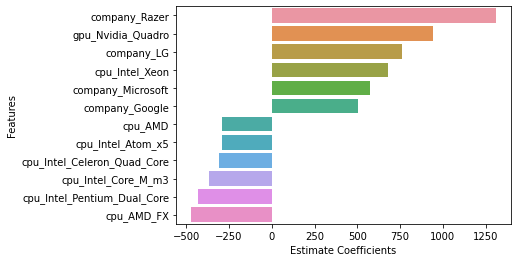

In [43]:
coef_lm = pd.DataFrame({'features': x_train.columns, 'estimate':lm_model.coef_}).sort_values(by = 'estimate', ascending = False)
top_last6 = coef_lm.iloc[np.r_[0:6, -6:0]]

sns.barplot(data = top_last6, x = 'estimate', y = 'features')
plt.xlabel('Estimate Coefficients')
plt.ylabel('Features')

Based on the top 6 highest and lowest coefficient of each feature, we can see that CPU type has the highest contribution toward the laptop price, followed by the OS type. If the laptop is installed with CPU Intel Xeon or Intel Celeron Quad Core, the price will go higher.

#### Model Evaluation

Let's check the prediction performance of the linear regression. We will use the R-squared (R2 Score) and the error measured by Root Mean Squared Error (RMSE). RMSE is a good measure to evaluate regression problem because they punish model more if there are observations that has high error.

In [44]:
pred_lm = lm_model.predict(x_test)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_lm), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_lm)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

R2 Score: 0.793
RMSE: 312.12
Price Standard Deviation: 686.157


We can compare the RMSE with the standard deviation of the price variable from the testing dataset. According to [Bowles](https://www.amazon.com/Machine-Learning-Spark-Python-Techniques/dp/1119561930), if the RMSE is lower than the standard deviation, then we can conclude that the model has a good performance. A good model should, on average, have better predictions than the naive estimate of the mean for all predictions.

### Lasso Regression

Lasso regression is a variant of linear regression that comes with a penalty on the loss function to help the model do regularization and reduce the model variance. Model with less variance will be better at predicing new data. The idea is to induce the penalty against complexity by adding the regularization term such as that with increasing value of regularization parameter, the weights get reduced (and, hence penalty induced).

As you may have learn before, linear regression try to get the best estimate value for the model intercept and slope for each feature by minimizing the Sum of Squared Error (SSE). 

$$
SSE = \Sigma_i^N (y_i - \hat y_i)^2
$$

Lasso Regression will add an L1 penalty with $\lambda$ constant to the loss function. If $\lambda$ equals zero, then the lasso regression become identical with the ordinary linear regression.

$$
SSE = \Sigma_{i=1}^N (y_i - \hat y_i)^2 + \lambda\ \Sigma_{j=1}^n |\beta_j|
$$

The benefit of using Lasso is that it can function as a feature selection method. This model will shrink and sometimes remove features so that we only have the features that affect the target data. To fit a Lasso model, we need to scale all features. The features need to have the same scale so that the coefficient values are chosen based only on which attribute is most useful, not on the basis of which one has the most favorable scale.

In [45]:
# Scale Features
x_scaler = StandardScaler().fit(x_train.to_numpy())

# Transform Data
x_train_norm = x_scaler.transform(x_train.to_numpy())
x_test_norm = x_scaler.transform(x_test.to_numpy())

The first thing we need to do to build a Lasso model is by choosing the appropriate value of $\lambda$ as the penalty constant. Luckily, the `sklearn` package has build in estimator can help us get the optimal hyper-parameter (in this case, $\lambda$ or $\alpha$) with Cross-Validation method to evaluate the model.

In the following step, we set 10-Fold Cross-Validation method to fit and evaluate the data and try 1000 different alpha as the penalty constant. The model will give us the best alpha to choose.

In [46]:
lasso_model_cv = LassoCV(cv = 10, n_alphas = 1000).fit(x_train_norm, y_train)

print('Best alpha: ' + str(np.round(lasso_model_cv.alpha_, 5)))

Best alpha: 0.80411


We can directly predict new data using the previously fitted model. Let's evaluate the model on the unseen testing dataset.

In [47]:
pred_lasso = lasso_model_cv.predict(x_test_norm)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_lasso), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_lasso)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

R2 Score: 0.794
RMSE: 311.765
Price Standard Deviation: 686.157


You can also try to refit the data into new Lasso model with the best alpha as the input. The result is the same.

In [48]:
lasso_model = Lasso(alpha = lasso_model_cv.alpha_).fit(x_train_norm, y_train)

pred_lasso = lasso_model.predict(x_test_norm)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_lasso), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_lasso)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

R2 Score: 0.794
RMSE: 311.765
Price Standard Deviation: 686.157


### Ridge Regression

Ridge regression is similar with Lasso by creating a penalty toward the lost function. The difference is that the ridge regression will square the coefficient instead of making it absolute for the penalty. Larger value of $\lambda$ will make the coefficient to be smaller, but never reach to 0 in Ridge regression.

$$
SSE = \Sigma_{i=1}^N (y_i - \hat y_i)^2 + \lambda\ \Sigma_{j=1}^n \beta_j^2
$$

In the following process, I set the possible alpha values from 0.0001 to 100 with different steps.

In [49]:
alpha_range = [1e-4, 1e-3, 1e-2, 0.1, 1]
alpha_range.extend(np.arange(10, 100, 1))

ridge_model_cv = RidgeCV(cv = 10, alphas = alpha_range).fit(x_train_norm, y_train)

ridge_model_cv.alpha_

63.0

Let's evaluate the model.

In [50]:
pred_ridge = ridge_model_cv.predict(x_test_norm)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_ridge), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_ridge)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

R2 Score: 0.796
RMSE: 309.696
Price Standard Deviation: 686.157


### Elastic Net Regression

Elastic Net combine both L1 penalty and the L2 penalty into a single formula. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

In the following example, we can set the ratio between the L1 and L2 penalty. If `l1_ratio` = 0, then the model will be Ridge regression while if `l1_ratio` = 1 then the model become Lasso regression.

In [51]:
elastic_model_cv = ElasticNetCV(l1_ratio = 0.5, n_alphas = 1000).fit(x_train_norm, y_train)

elastic_model_cv.alpha_

1.033130885575969

Let's evaluate the model.

In [52]:
pred_elastic = elastic_model_cv.predict(x_test_norm)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_elastic), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_elastic)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

R2 Score: 0.787
RMSE: 316.605
Price Standard Deviation: 686.157


Different `l1_ratio` will give us different model performance.

In [53]:
elastic_model_cv = ElasticNetCV(l1_ratio = 0.8, n_alphas = 1000).fit(x_train_norm, y_train)

pred_elastic = elastic_model_cv.predict(x_test_norm)

print('R2 Score: ' + str(np.round(r2_score(y_test, pred_elastic), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_elastic)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

R2 Score: 0.797
RMSE: 309.048
Price Standard Deviation: 686.157


We can put multiple `l1_ratio` to try with list.

In [54]:
elastic_model_cv = ElasticNetCV(l1_ratio = [0.05, 0.1, 0.2, 0.3, 0.7, 0.8, 0.9, 0.95], n_alphas = 1000).fit(x_train_norm, y_train)

pred_elastic = elastic_model_cv.predict(x_test_norm)

print('Chosen L1 ratio: ', elastic_model_cv.l1_ratio_)
print('R2 Score: ' + str(np.round(r2_score(y_test, pred_elastic), 3)))
print('RMSE: ' + str(np.round(np.sqrt(mean_squared_error(y_test, pred_elastic)), 3)) )
print('Price Standard Deviation: ' + str(np.round(np.std(y_test), 3)))

Chosen L1 ratio:  0.9
R2 Score: 0.796
RMSE: 309.797
Price Standard Deviation: 686.157


Based on our result, all regularization method works better than the vanilla linear regression, with the Elastic Net achieve the lowest error on testing dataset.